##### The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. 
Iris Dataset is considered as the Hello World for data science. It contains five columns namely – Petal Length, Petal Width, Sepal Length, Sepal Width, and Species Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally.

The columns in this dataset are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

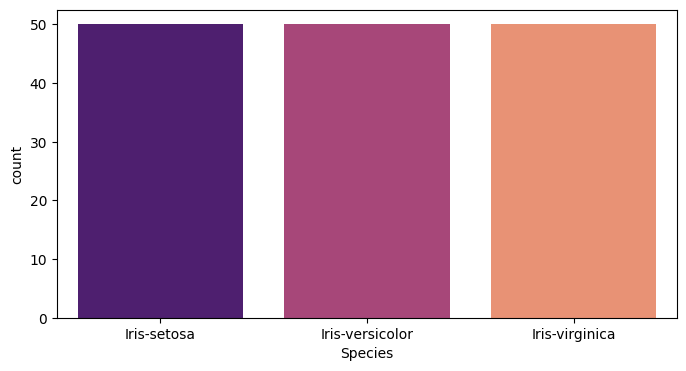

In [10]:
plt.figure(figsize=(8,4)) 
sns.countplot(x='Species',data=df ,palette='magma')

In [11]:
## Univariate analysis
df.groupby('Species').agg(['mean', 'median'])  # passing a list of recognized strings

Id        SepalLengthCm        SepalWidthCm          
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4  \
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

In [12]:
#or
df.groupby('Species').agg([np.mean, np.median])

Id        SepalLengthCm        SepalWidthCm          
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4  \
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

<Axes: xlabel='SepalLengthCm'>

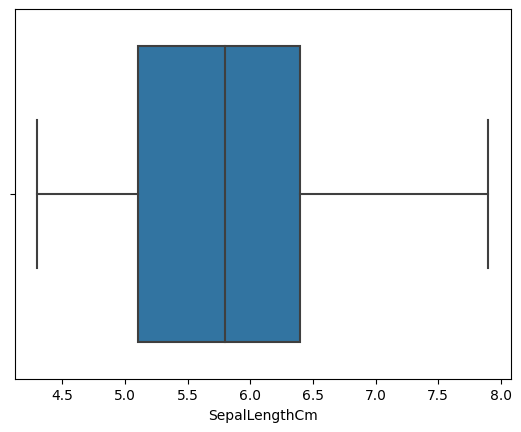

In [13]:
sns.boxplot(x='SepalLengthCm', data=df)

SepalLength has no outlier

<Axes: xlabel='SepalWidthCm'>

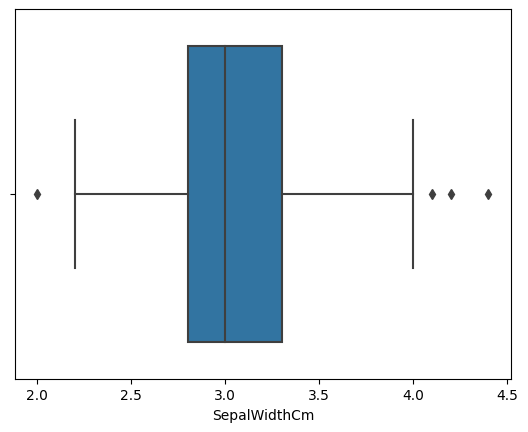

In [14]:
sns.boxplot(x='SepalWidthCm', data=df)

SepalWidth has 4 outlier so we can remove it

In [15]:
x=df[(df.SepalWidthCm>4.0) | (df.SepalWidthCm==2.0)]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [16]:
df.drop(index=x.index,axis=0,inplace=True)

<Axes: xlabel='SepalWidthCm'>

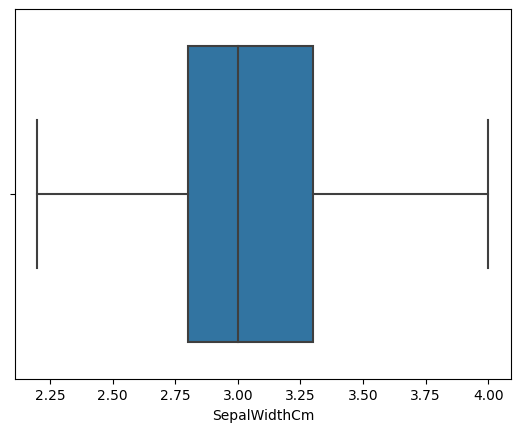

In [17]:
sns.boxplot(x='SepalWidthCm', data=df)

<Axes: xlabel='PetalLengthCm'>

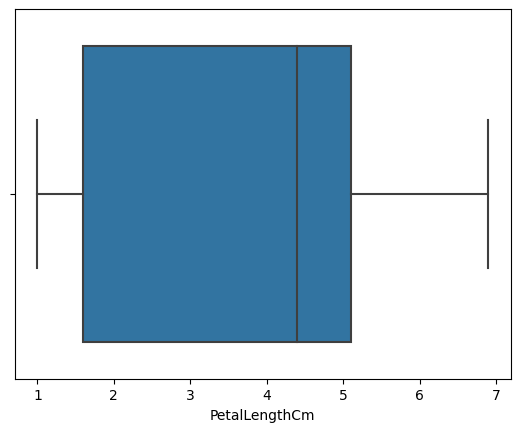

In [18]:
sns.boxplot(x='PetalLengthCm', data=df)

<Axes: xlabel='PetalWidthCm'>

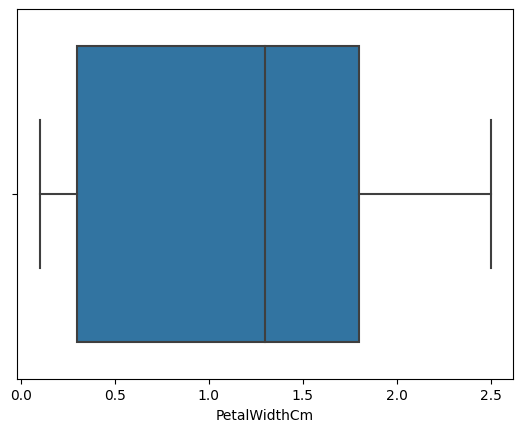

In [19]:
sns.boxplot(x='PetalWidthCm', data=df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

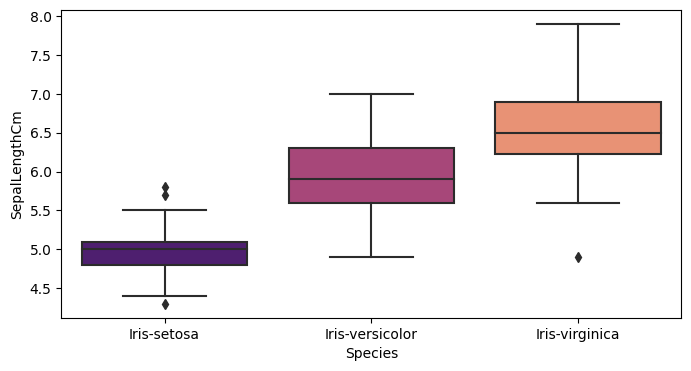

In [20]:
## Box plot 
plt.figure(figsize=(8,4)) 
sns.boxplot(x='Species',y='SepalLengthCm',data=df ,palette='magma')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

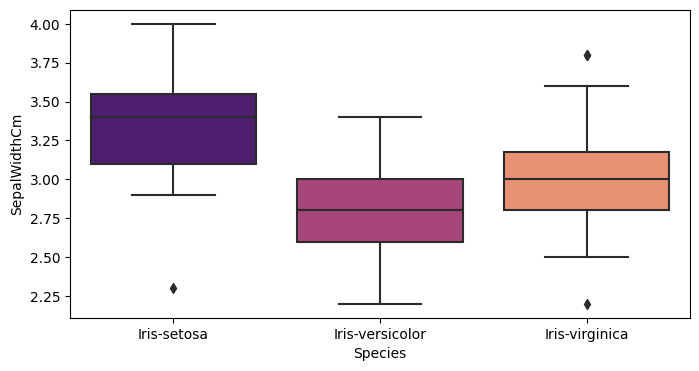

In [21]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x='Species',y='SepalWidthCm',data=df ,palette='magma')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

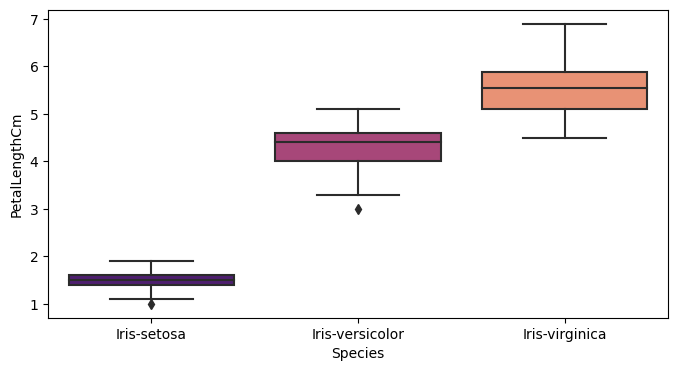

In [22]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x='Species',y='PetalLengthCm',data=df ,palette='magma')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

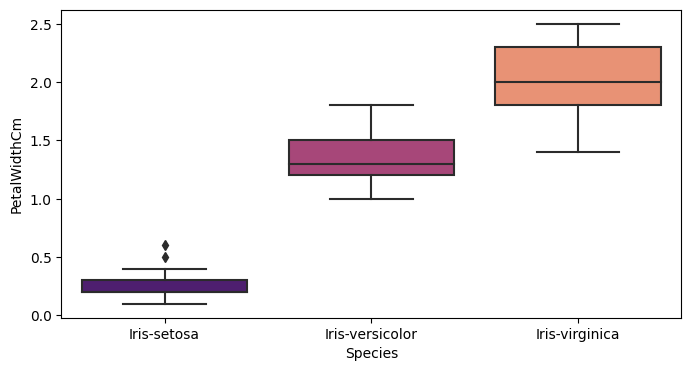

In [23]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x='Species',y='PetalWidthCm',data=df ,palette='magma')

In [24]:
## Distribution of particular species

C:\Users\welcomm\AppData\Local\Temp\ipykernel_44716\338952547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLengthCm'],bins=20)


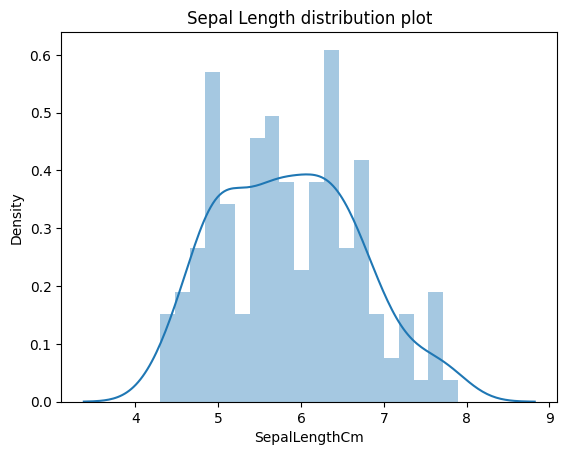

In [25]:
sns.distplot(df['SepalLengthCm'],bins=20)
plt.title('Sepal Length distribution plot')
plt.show()

C:\Users\welcomm\AppData\Local\Temp\ipykernel_44716\3020457753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalWidthCm'],bins=30)


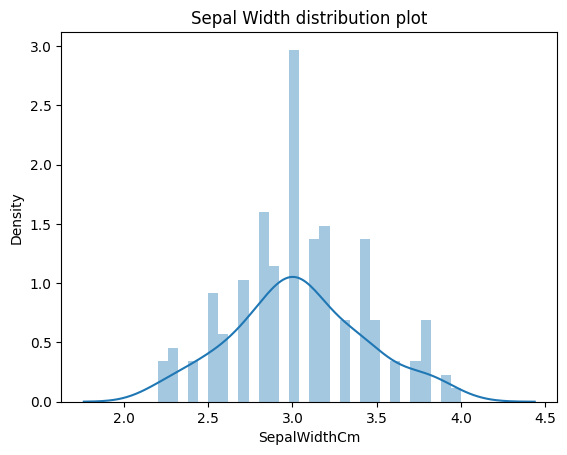

In [26]:
sns.distplot(df['SepalWidthCm'],bins=30)
plt.title('Sepal Width distribution plot')
plt.show()

C:\Users\welcomm\AppData\Local\Temp\ipykernel_44716\670821484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'],bins=30)


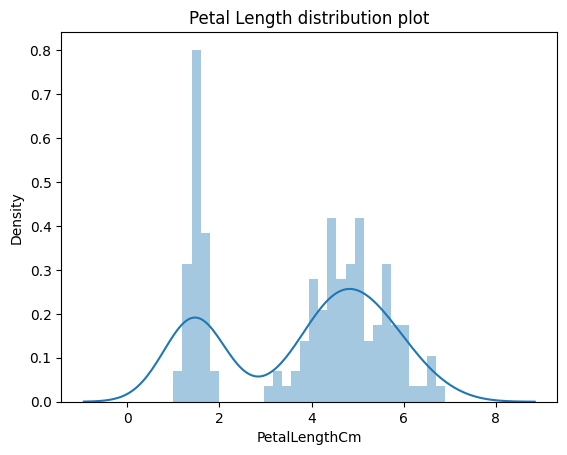

In [27]:
sns.distplot(df['PetalLengthCm'],bins=30)
plt.title('Petal Length distribution plot')
plt.show()

C:\Users\welcomm\AppData\Local\Temp\ipykernel_44716\3410833937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalWidthCm'],bins=30)


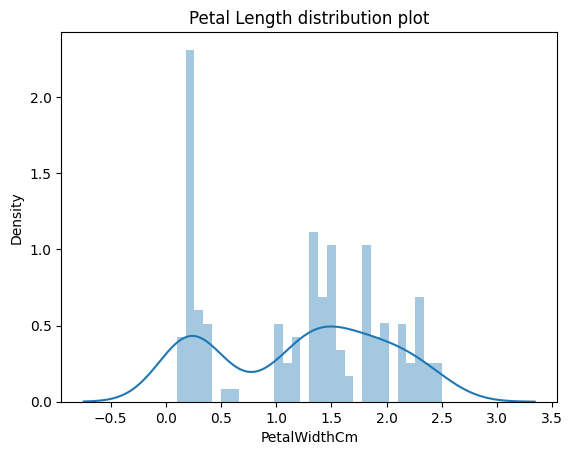

In [28]:
sns.distplot(df['PetalWidthCm'],bins=30)
plt.title('Petal Length distribution plot')
plt.show()

In [29]:
a=df.corr(numeric_only=True)
a

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.718722,-0.384320,0.880016,0.898193
SepalLengthCm,0.718722,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.384320,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.880016,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.898193,0.822577,-0.329782,0.961755,1.000000


<Axes: >

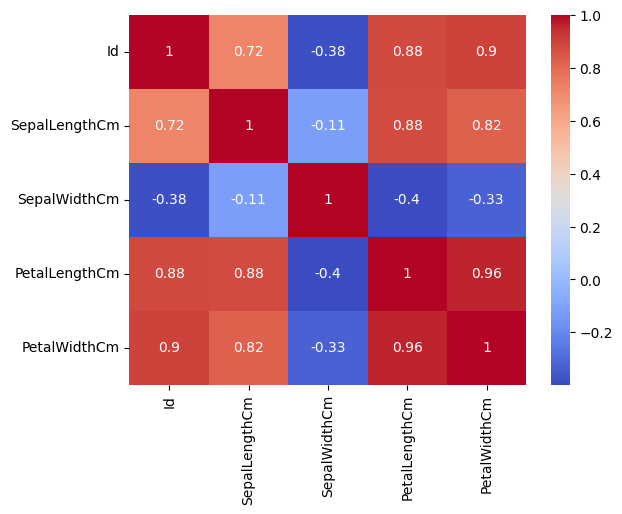

In [30]:
sns.heatmap(a,annot=True,cmap='coolwarm')

Multivariate Analysis

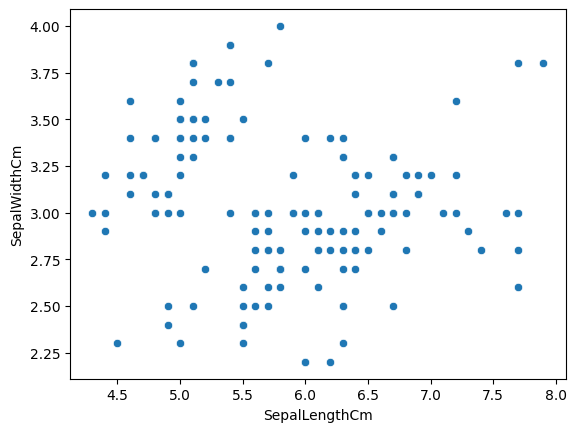

In [31]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df)
plt.show()

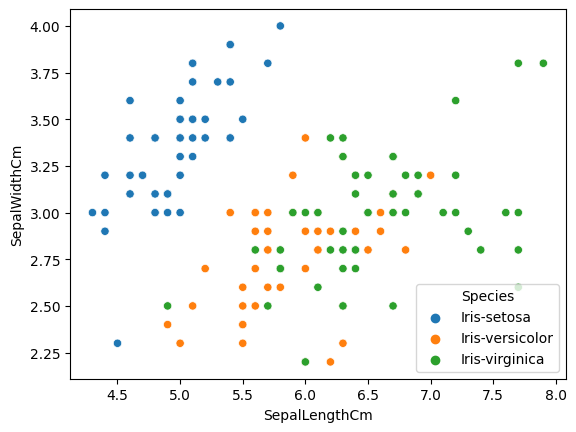

In [32]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')
plt.show()

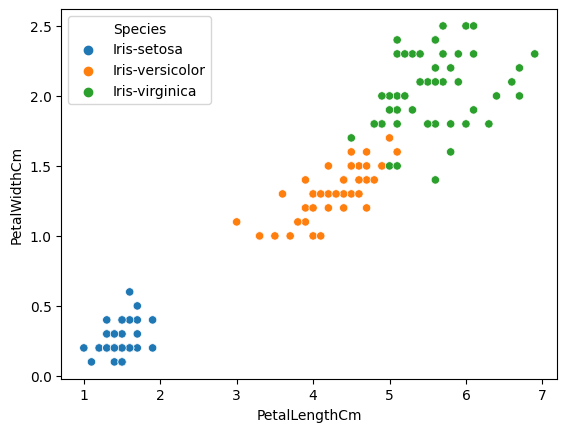

In [33]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')
plt.show()

(array([46.,  7., 41., 29., 23.]),
 array([0.1 , 0.58, 1.06, 1.54, 2.02, 2.5 ]),
 <BarContainer object of 5 artists>)

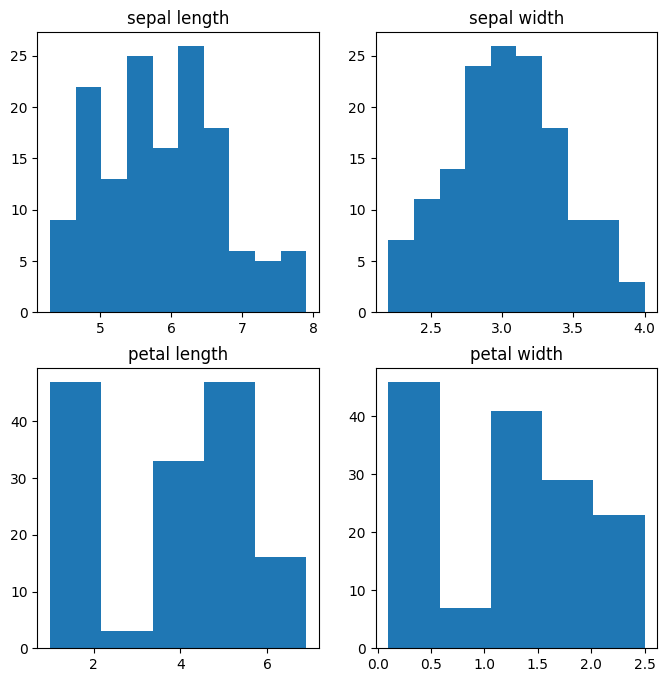

In [34]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("sepal length")
ax[0,0].hist(df['SepalLengthCm'], bins=10)

ax[0,1].set_title("sepal width")
ax[0,1].hist(df['SepalWidthCm'], bins=10)

ax[1,0].set_title("petal length")
ax[1,0].hist(df['PetalLengthCm'], bins=5)

ax[1,1].set_title("petal width")
ax[1,1].hist(df['PetalWidthCm'], bins=5)